## Проклятие размерности

In [1]:
import numpy as np
import scipy.stats as sps

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

Сгенерируем 1000 случайных векторов в единичном кубе размерности $d$. Для каждой размерности $d$ от 1 до 3000 посчитаем среднюю норму вектора и стандартное отклонение.

In [ ]:
N_dim = 3000
dimentions = np.arange(1, N_dim+1)
sample_size = 1000

means = np.zeros(N_dim)
stds = np.zeros(N_dim)

for d in dimentions:
    sample = sps.uniform.rvs(size=(sample_size, d))
    norm = np.sqrt((sample**2).sum(axis=1))
    means[d-1] = norm.mean()
    stds[d-1] = norm.std()
    if d in [500, 1000, 1500, 2000, 2500]:
        print(means[d-5:d], stds[d-5:d])

[12.86205393 12.88139702 12.86573316 12.88366032 12.90164442] [0.25780418 0.24823403 0.25665039 0.25896475 0.25325433]


Визуализируем. Видим, что средняя норма увеличивается с ростом размерности пространства, но разброс остается примерно постоянным.

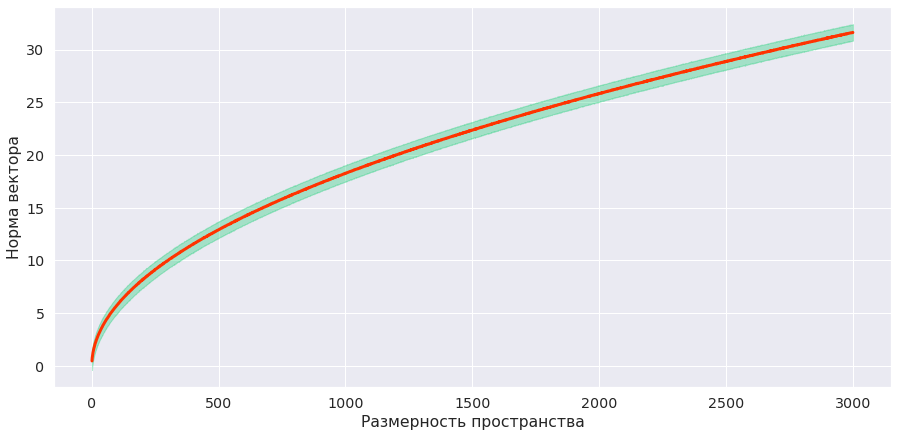

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(dimentions, means, color=red, lw=3)
plt.fill_between(dimentions, means - 3*stds, means + 3*stds, 
                 color=green, alpha=0.3)
plt.xlabel('Размерность пространства')
plt.ylabel('Норма вектора');

Посмотрим на график величины разброса нормы по отношению к ее среднему значению. Как и следовало ожидать, эта величина сходится к нулю с ростом размерности пространства.

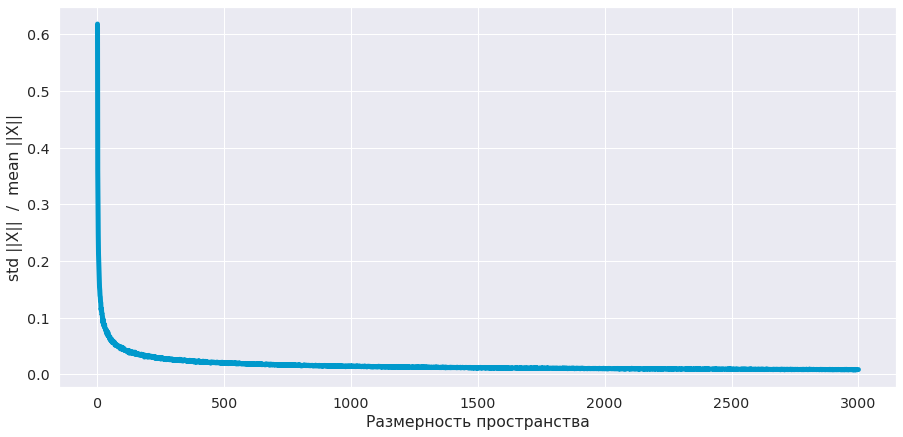

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(dimentions, stds/means, lw=5, color=blue)
plt.xlabel('Размерность пространства')
plt.ylabel('std ||X||  /  mean ||X||');

Убедимся, что разброс не меняется с ростом размерности пространства. Шум обусловлен конечным размером выборки.

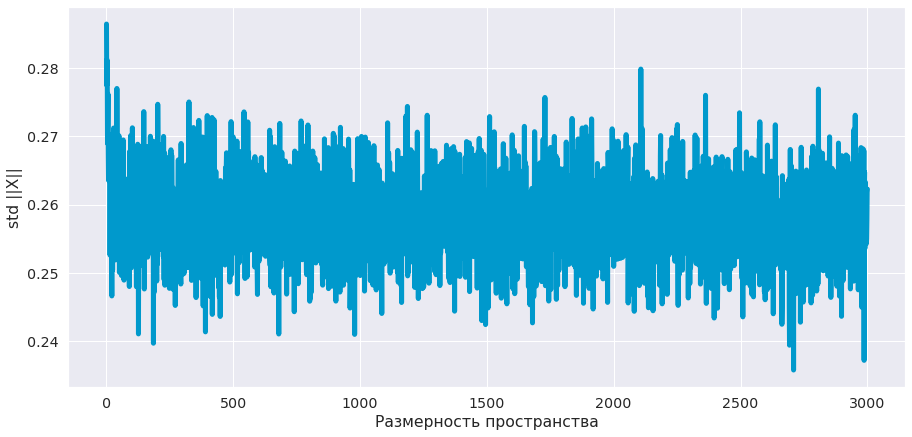

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(dimentions, stds, lw=5, color=blue)
plt.xlabel('Размерность пространства')
plt.ylabel('std ||X||');

Полученные свойства визуализируют одно из неприятных особенностей проклятия размерности --- неинформативность расстояний. Это проявляется тем, что при анализе данных расстояния между любыми парами точек сосредоточены вокруг некоторого значения, а изменения могут быть сопоставимы с шумом. 

По этой причине на практике при анализе данных большой размерности нельзя использовать методы, явным образом использующие расстояния между объектами. Например, метод ближайшего соседа, t-SNE. Однако, некоторые методы могут модифицировать метрику, например, как это делает UMAP. Такие методы можно использовать для анализа данных большой размерности.